<a href="https://colab.research.google.com/github/2yeeji/IMEN415/blob/main/%5B%EB%8B%A4%EB%B3%80%EB%9F%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%5D%5B%EA%B3%BC%EC%A0%9C3%5D%5B2021150456%5D%5B%EC%9D%B4%EC%98%88%EC%A7%80%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/다변량분석/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/다변량분석


#Q1

In [ ]:
import pandas as pd

fetal = pd.read_csv("fetal_health.csv")
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
fetal['fetal_health'].value_counts()/len(fetal['fetal_health'])

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: count, dtype: float64

In [ ]:
X = fetal.drop("fetal_health", axis=1)
y = fetal['fetal_health']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=12345,
                                                    stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                train_size=0.5,
                                                random_state=12345,
                                                stratify=y_temp)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 1172 to 1277
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1275 non-null   float64
 1   accelerations                                           1275 non-null   float64
 2   fetal_movement                                          1275 non-null   float64
 3   uterine_contractions                                    1275 non-null   float64
 4   light_decelerations                                     1275 non-null   float64
 5   severe_decelerations                                    1275 non-null   float64
 6   prolongued_decelerations                                1275 non-null   float64
 7   abnormal_short_term_variability                         1275 non-null   float64
 8   mean_value_of_short_term_variability    

In [ ]:
print(y_train.value_counts()/len(y_train))
print(y_train.value_counts())
print(y_val.value_counts()/len(y_val))
print(y_val.value_counts())
print(y_test.value_counts()/len(y_test))
print(y_test.value_counts())

fetal_health
1.0    0.778039
2.0    0.138824
3.0    0.083137
Name: count, dtype: float64
fetal_health
1.0    992
2.0    177
3.0    106
Name: count, dtype: int64
fetal_health
1.0    0.778824
2.0    0.138824
3.0    0.082353
Name: count, dtype: float64
fetal_health
1.0    331
2.0     59
3.0     35
Name: count, dtype: int64
fetal_health
1.0    0.779343
2.0    0.138498
3.0    0.082160
Name: count, dtype: float64
fetal_health
1.0    332
2.0     59
3.0     35
Name: count, dtype: int64


#Q2

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=12345)
CART_post = clf.fit(X_train, y_train)

In [ ]:
CART_post.score(X_train, y_train)

1.0

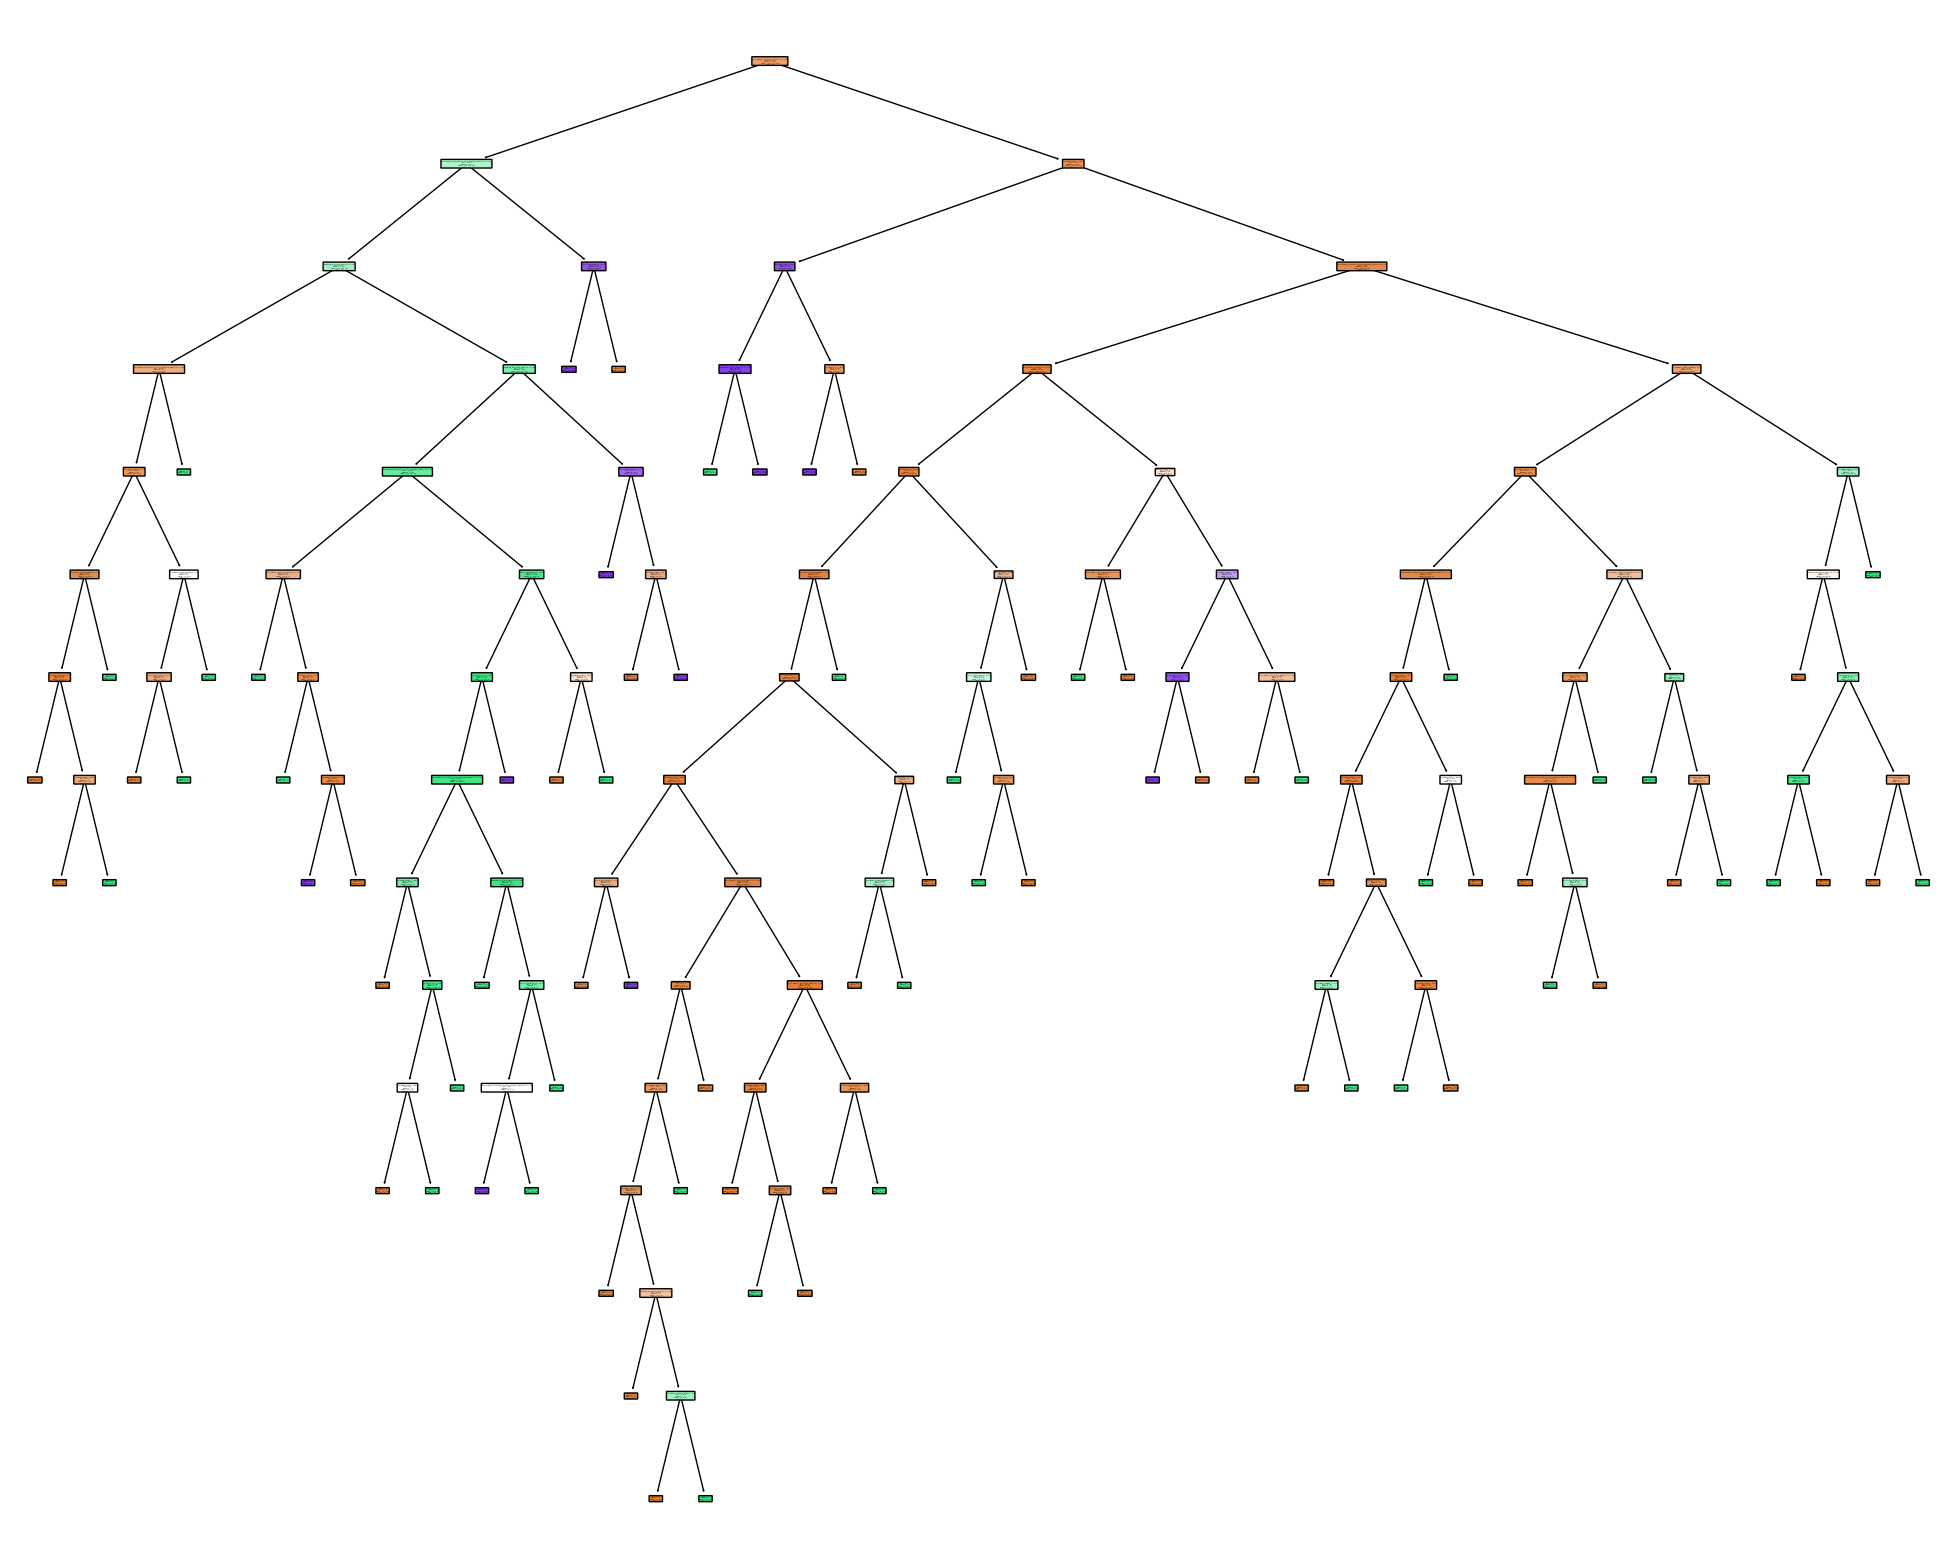

In [ ]:
import matplotlib.pyplot as plt

# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(CART_post,
              feature_names=X_train.columns.values,
              class_names=list(map(str, y_train.unique())),
              rounded=True,
              filled=True)
plt.show()

In [ ]:
print(CART_post.get_depth())
print(CART_post.get_n_leaves())

14
80


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score

# Performance Evaluation Function ------------------------------------------------
def perf_eval(model, y_test, X_test):

    cm = confusion_matrix(y_test, model.predict(X_test))

    print(cm)

    # True positive rate: TPR (Recall)
    TPR = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))+(cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))+(cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2])))/3
    # Precision
    PRE = ((cm[0,0]/(cm[0,0]+cm[1,0]+cm[2,0]))+(cm[1,1]/(cm[0,1]+cm[1,1]+cm[2,1]))+(cm[2,2]/(cm[0,2]+cm[1,2]+cm[2,2])))/3
    # True negative rate: TNR
    TNR = (((cm[1,1]+cm[2,2])/(cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]))+((cm[0,0]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[2,0]+cm[2,1]+cm[2,2]))+((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2])))/3
    # Simple Accuracy
    ACC = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2])
    # Balanced Correction Rate
    BCR = np.cbrt((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))*(cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))*(cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2])))
    # F1-Measure
    F1 = f1_score(y_test, model.predict(X_test), average="macro")
    # AUROC
    AUROC = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average="macro")

    return TPR, PRE, TNR, ACC, BCR, F1, AUROC

In [ ]:
# Performance table
Perf_Table = pd.DataFrame(index=["Full Tree", "Post-Pruning", "Pre-Pruning"],
                          columns = ["TPR", "Precision", "TNR",
                                     "Accuracy", "BCR", "F1-Measure", "AUROC"])

In [ ]:
Perf_Table.iloc[0] = perf_eval(CART_post, y_test, X_test)
Perf_Table

[[312  19   1]
 [ 19  40   0]
 [  3   2  30]]


,TPR,Precision,TNR,Accuracy,BCR,F1-Measure,AUROC
Full Tree,0.824956,0.852537,0.858939,0.896714,0.817384,0.837565,0.863508
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

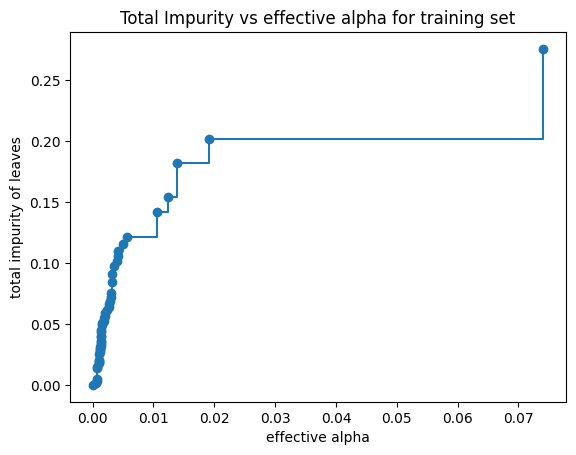

In [ ]:
# Find the best tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the impurity vs effective aplha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09264204155483308


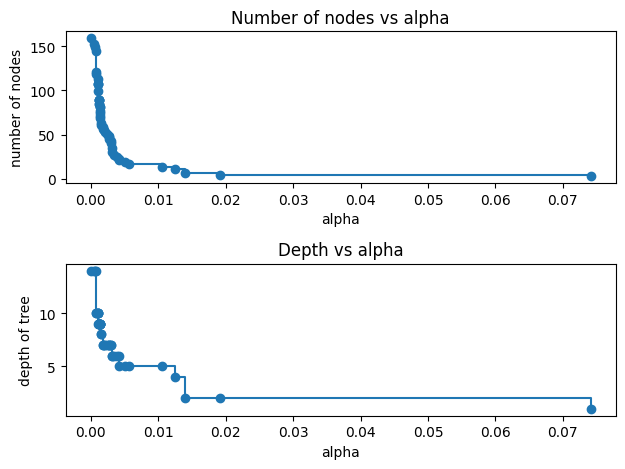

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

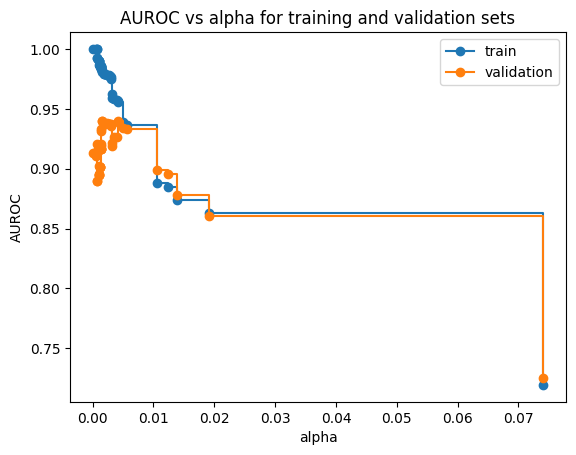

In [ ]:
train_scores = [roc_auc_score(y_train, clf.predict_proba(X_train), multi_class='ovr', average="macro") for clf in clfs]
val_scores = [roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr', average="macro") for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("AUROC")
ax.set_title("AUROC vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

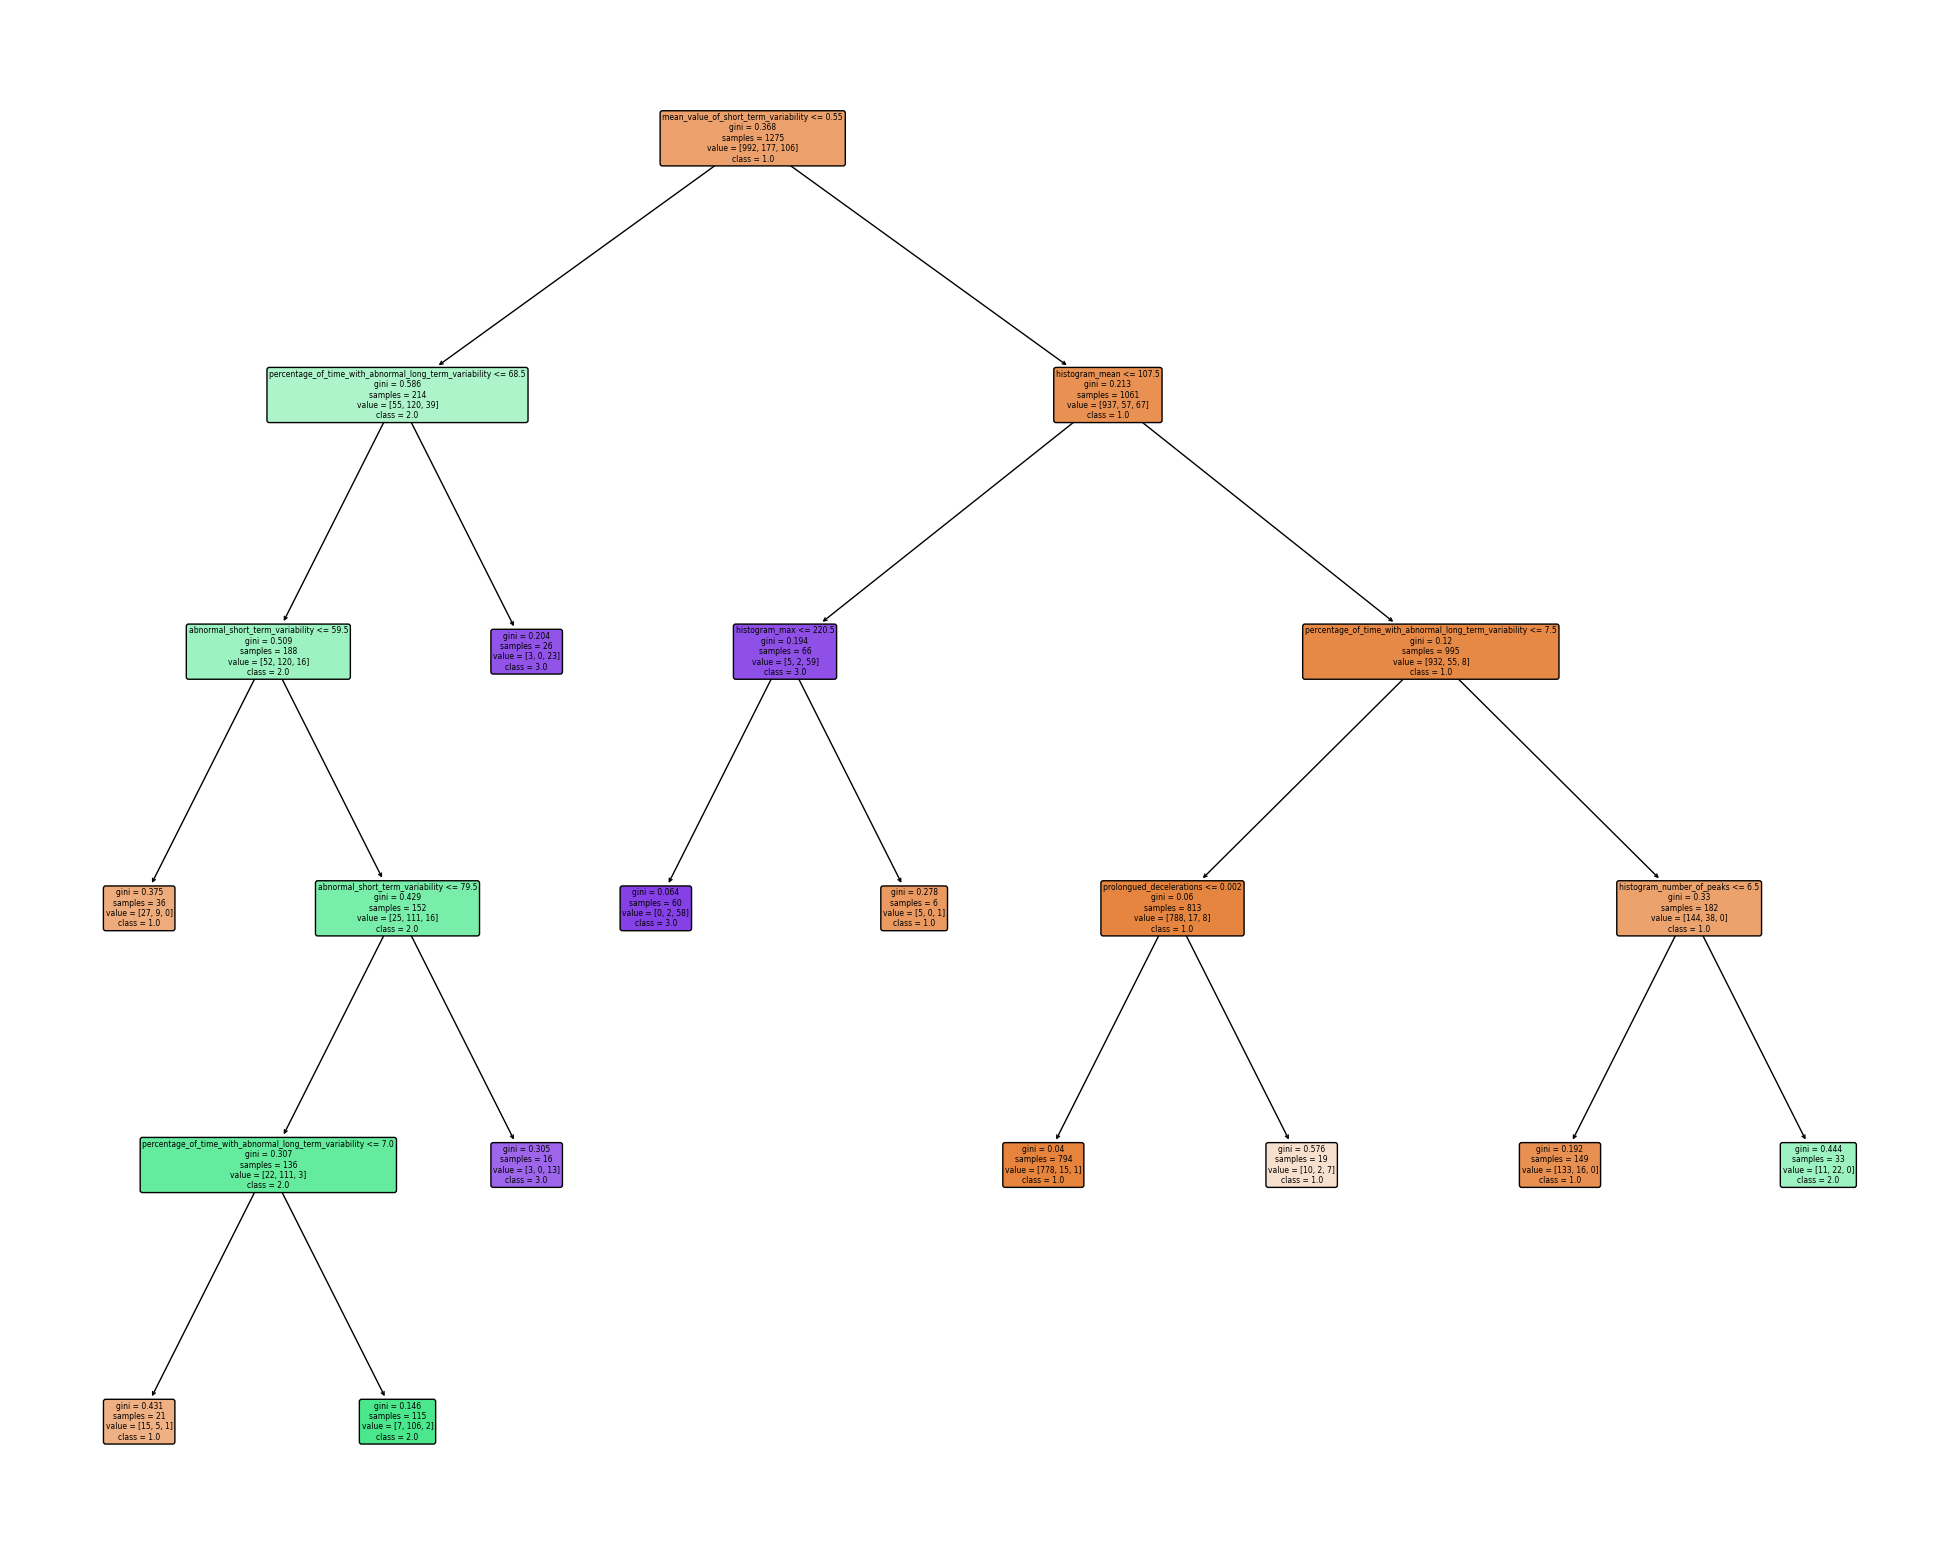

In [ ]:
best_clf = clfs[np.argmax(val_scores)]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=X_train.columns.values,
              class_names=list(map(str, y_train.unique())),
              rounded=True,
              filled=True)

In [ ]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.004235733509089911, random_state=12345)

In [ ]:
print(best_clf.get_depth())
print(best_clf.get_n_leaves())

5
11


In [ ]:
# Prediction
Perf_Table.iloc[1] = perf_eval(best_clf, y_test, X_test)
Perf_Table

[[323   8   1]
 [ 21  38   0]
 [  6   1  28]]


,TPR,Precision,TNR,Accuracy,BCR,F1-Measure,AUROC
Full Tree,0.824956,0.852537,0.858939,0.896714,0.817384,0.837565,0.863508
Post-Pruning,0.805653,0.898962,0.860602,0.913146,0.794381,0.846398,0.917399
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Q3

In [ ]:
# Combine train & validation dataset
X = pd.concat([X_train, X_val], axis=0)
y = pd.concat([y_train, y_val], axis=0)

In [ ]:
# Tree parameter settings
criterion = ["gini", "entropy", "log_loss"]
max_depth = [3, 5, 7, 10, None]
min_samples_leaf = [5, 10, 20, 30, 50]
min_split = [10, 30, 50, 70, 100]

param_grid = {
    'criterion': criterion,
    'min_samples_split': min_split,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fit the decision tree model and evaluate the results
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc_ovr')
grid.fit(X, y)

# Find the best set of parameters
best_criterion = grid.best_params_['criterion']
best_split = grid.best_params_['min_samples_split']
best_depth = grid.best_params_['max_depth']
best_leaf = grid.best_params_['min_samples_leaf']

print("Best criterion:", best_criterion)
print("Best min_samples_split:", best_split)
print("Best max_depth:", best_depth)
print("Best min_samples_leaf:", best_leaf)

Best criterion: entropy
Best min_samples_split: 10
Best max_depth: 7
Best min_samples_leaf: 20


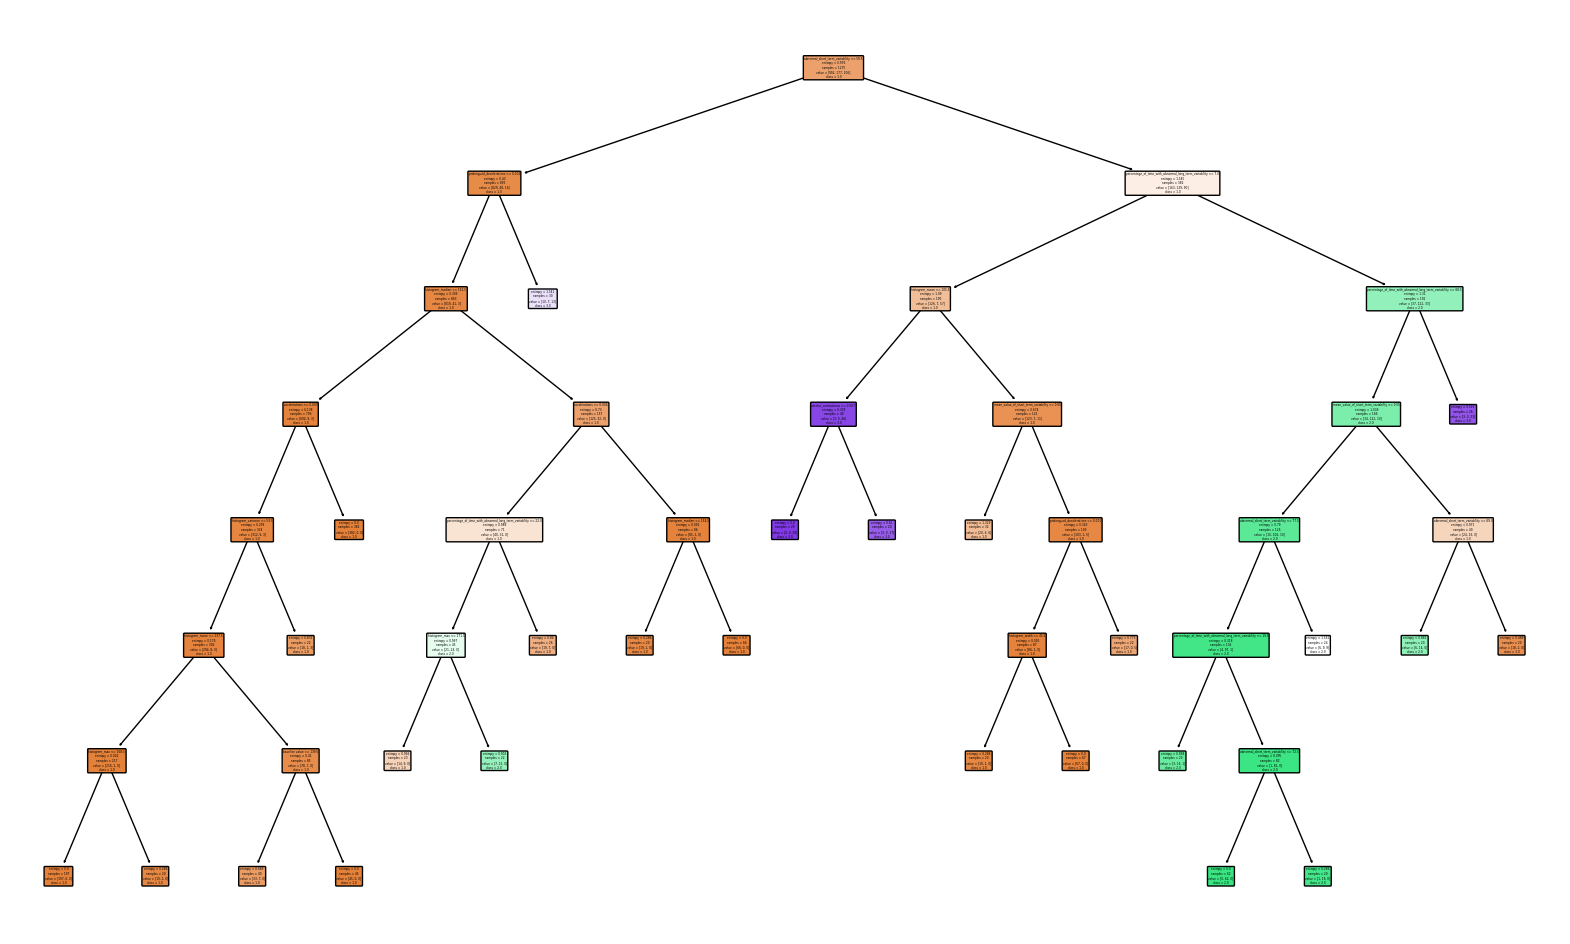

In [ ]:
# Plot the best tree
CART_pre = DecisionTreeClassifier(**grid.best_params_)
CART_pre.fit(X_train,y_train)
plt.figure(figsize=(20,12))
plot_tree(CART_pre,
          feature_names=X_train.columns.values,
          class_names=list(map(str, y_train.unique())),
          rounded=True,
          filled=True)
plt.show()

In [ ]:
print(CART_pre.get_depth())
print(CART_pre.get_n_leaves())

7
25


In [ ]:
# Prediction
Perf_Table.iloc[2] = perf_eval(CART_pre, y_test, X_test)
Perf_Table

[[321   8   3]
 [ 18  40   1]
 [  7   4  24]]


,TPR,Precision,TNR,Accuracy,BCR,F1-Measure,AUROC
Full Tree,0.824956,0.852537,0.858939,0.896714,0.817384,0.837565,0.863508
Post-Pruning,0.805653,0.898962,0.860602,0.913146,0.794381,0.846398,0.917399
Pre-Pruning,0.776849,0.851373,0.84806,0.903756,0.766019,0.809843,0.950073


#Q4

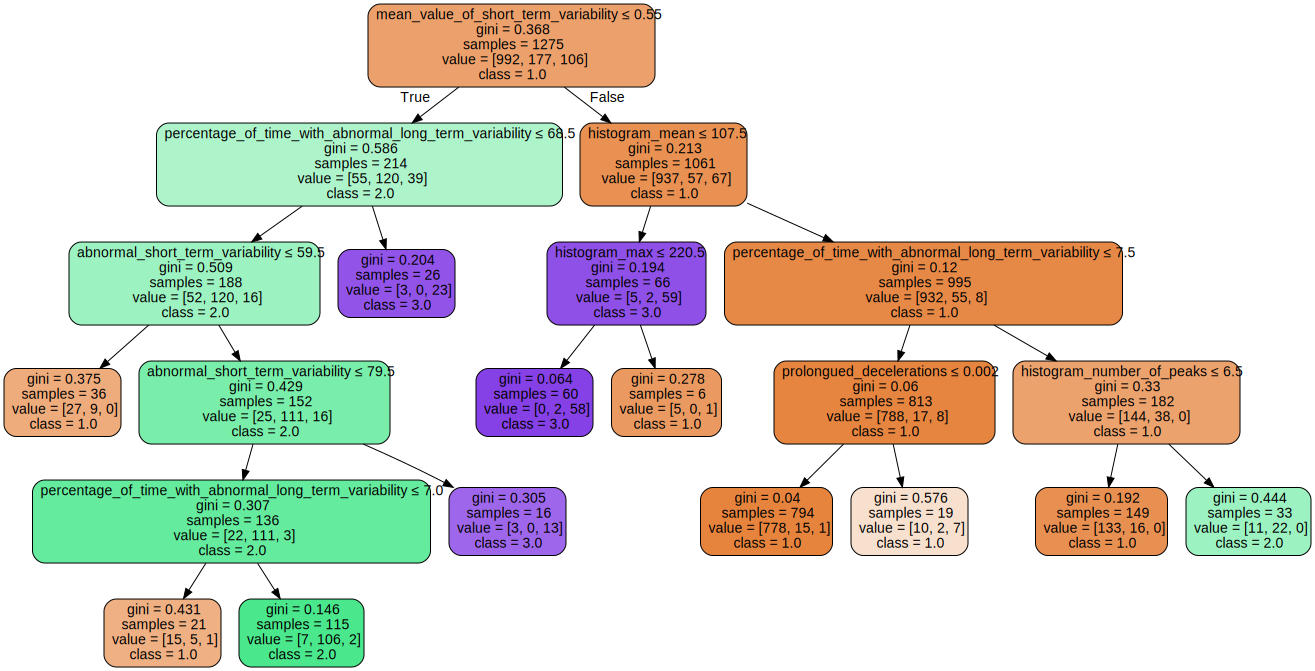

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(best_clf,
                           out_file=None,
                           feature_names=X_train.columns.values,
                           class_names=list(map(str, y_train.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

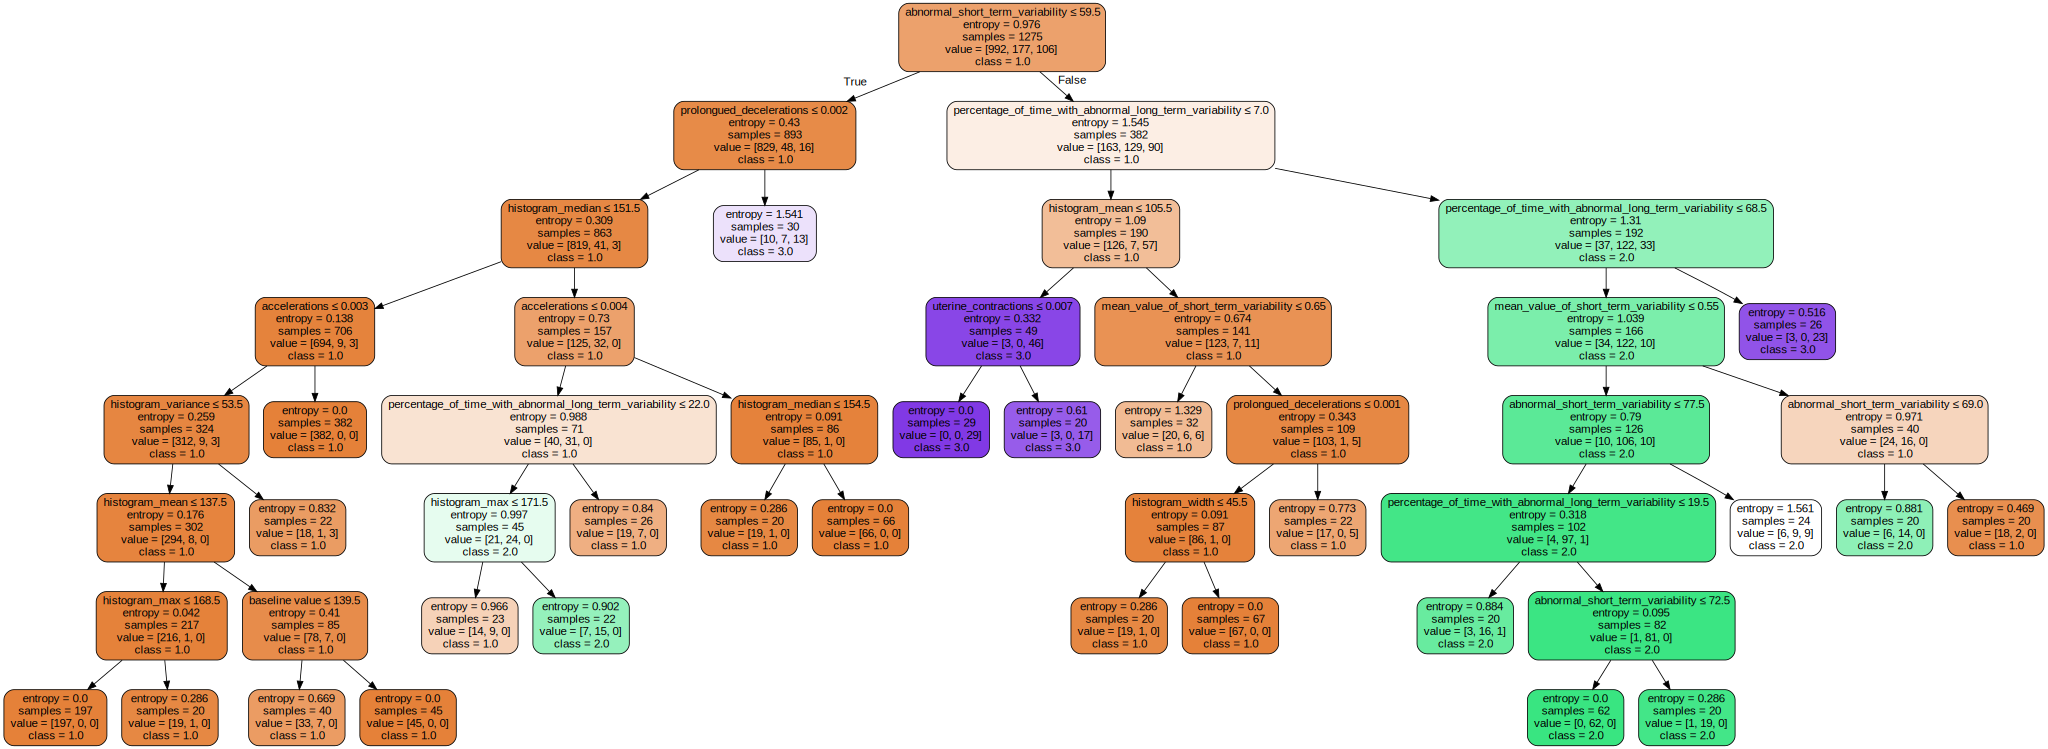

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(CART_pre,
                           out_file=None,
                           feature_names=X_train.columns.values,
                           class_names=list(map(str, y_train.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True)
graphviz.Source(dot_data)

#Q5 - Q4에서 도사함.

#Q6

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fetal = pd.read_csv("fetal_health.csv")
X = fetal.drop("fetal_health", axis=1)
y = fetal['fetal_health']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_norm, y,
                                                    train_size=0.6,
                                                    random_state=12345,
                                                    stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                train_size=0.5,
                                                random_state=12345,
                                                stratify=y_temp)

In [ ]:
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

ml_logit = LogisticRegression(multi_class='ovr', solver='newton-cg')
ml_logit.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='newton-cg')

In [ ]:
# NN parameter settings
hidden_layer_sizes = [(5,), (10,), (15,), (20,), (5,5), (10,10), (15,15), (20,20)]
activation = ['identity', 'logistic', 'tanh', 'relu']
learning_rate_init = [0.001, 0.01, 0.1]
max_iter = [100, 300, 500]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings(action='ignore')

# Fit the decision tree model and evaluate the results
model = MLPClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc_ovr')
grid.fit(X, y)

# Find the best set of parameters
best_hidden_layer_sizes = grid.best_params_['hidden_layer_sizes']
best_activation = grid.best_params_['activation']
best_learning_rate_init = grid.best_params_['learning_rate_init']
best_max_iter = grid.best_params_['max_iter']

print("Best hidden_layer_sizes:", best_hidden_layer_sizes)
print("Best activation:", best_activation)
print("Best learning_rate_init:", best_learning_rate_init)
print("Best max_iter:", best_max_iter)

Best hidden_layer_sizes: (20, 20)
Best activation: relu
Best learning_rate_init: 0.01
Best max_iter: 300


In [ ]:
MLP = MLPClassifier(**grid.best_params_)
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=300)

In [ ]:
roc_auc_score(y_test, MLP.predict_proba(X_test), multi_class='ovr', average="macro")

0.97369676882043

#Q7

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score

# Performance Evaluation Function ------------------------------------------------
def perf_eval(model, y_test, X_test):

    cm = confusion_matrix(y_test, model.predict(X_test))

    print(cm)

    # True positive rate: TPR (Recall)
    TPR = ((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))+(cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))+(cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2])))/3
    # True negative rate: TNR
    TNR = (((cm[1,1]+cm[2,2])/(cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]))+((cm[0,0]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[2,0]+cm[2,1]+cm[2,2]))+((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2])))/3
    # Simple Accuracy
    ACC = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2])
    # Balanced Correction Rate
    BCR = np.cbrt((cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]))*(cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]))*(cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2])))
    # F1-Measure
    F1 = f1_score(y_test, model.predict(X_test), average="macro")

    return TPR, TNR, ACC, BCR, F1

# Performance table
Perf_Table = pd.DataFrame(index=["Logistic Regression", "Neural Network"],
                          columns = ["TPR", "TNR", "Accuracy", "BCR", "F1-Measure"])

In [ ]:
Perf_Table.iloc[0] = perf_eval(ml_logit, y_test, X_test)
Perf_Table.iloc[1] = perf_eval(MLP, y_test, X_test)
Perf_Table

[[318  14   0]
 [ 23  33   3]
 [  3   7  25]]
[[324   8   0]
 [ 15  42   2]
 [  1   6  28]]


,TPR,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.743813,0.816441,0.882629,0.726007,0.77285
Neural Network,0.829256,0.879957,0.924883,0.822176,0.852086


#Q8

In [ ]:
import pandas as pd

apple = pd.read_csv("apple_quality.csv")
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
apple = apple.dropna()
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [ ]:
apple['Quality'].value_counts()/len(apple['Quality'])

Quality
good    0.501
bad     0.499
Name: count, dtype: float64

In [ ]:
apple['Quality'] = apple['Quality'].apply(lambda x: 1 if x == 'bad' else 0)

In [ ]:
X = apple.drop(["A_id","Quality"], axis=1)
y = apple['Quality']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_norm, y,
                                                    train_size=0.8,
                                                    random_state=12345,
                                                    stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                train_size=0.5,
                                                random_state=12345,
                                                stratify=y_temp)

#Q9

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=12345)
CART_post = clf.fit(X_train, y_train)

In [ ]:
print(CART_post.get_depth())
print(CART_post.get_n_leaves())

21
383


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Find the best tree
path = CART_post.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [roc_auc_score(y_train, clf.predict(X_train)) for clf in clfs]
val_scores = [roc_auc_score(y_val, clf.predict(X_val)) for clf in clfs]

best_clf = clfs[np.argmax(val_scores)]

print(best_clf.get_depth())
print(best_clf.get_n_leaves())

18
289


In [ ]:
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

In [ ]:
criterion = ["gini", "entropy", "log_loss"]
max_depth = [7, 10, 15, None]
min_samples_leaf = [10, 20, 30, 40, 50]
min_split = [10, 30, 50, 70, 100]

param_grid = {
    'criterion': criterion,
    'min_samples_split': min_split,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fit the decision tree model and evaluate the results
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid.fit(X, y)

# Find the best set of parameters
best_criterion = grid.best_params_['criterion']
best_split = grid.best_params_['min_samples_split']
best_depth = grid.best_params_['max_depth']
best_leaf = grid.best_params_['min_samples_leaf']

print("Best criterion:", best_criterion)
print("Best min_samples_split:", best_split)
print("Best max_depth:", best_depth)
print("Best min_samples_leaf:", best_leaf)

Best criterion: entropy
Best min_samples_split: 30
Best max_depth: 10
Best min_samples_leaf: 10


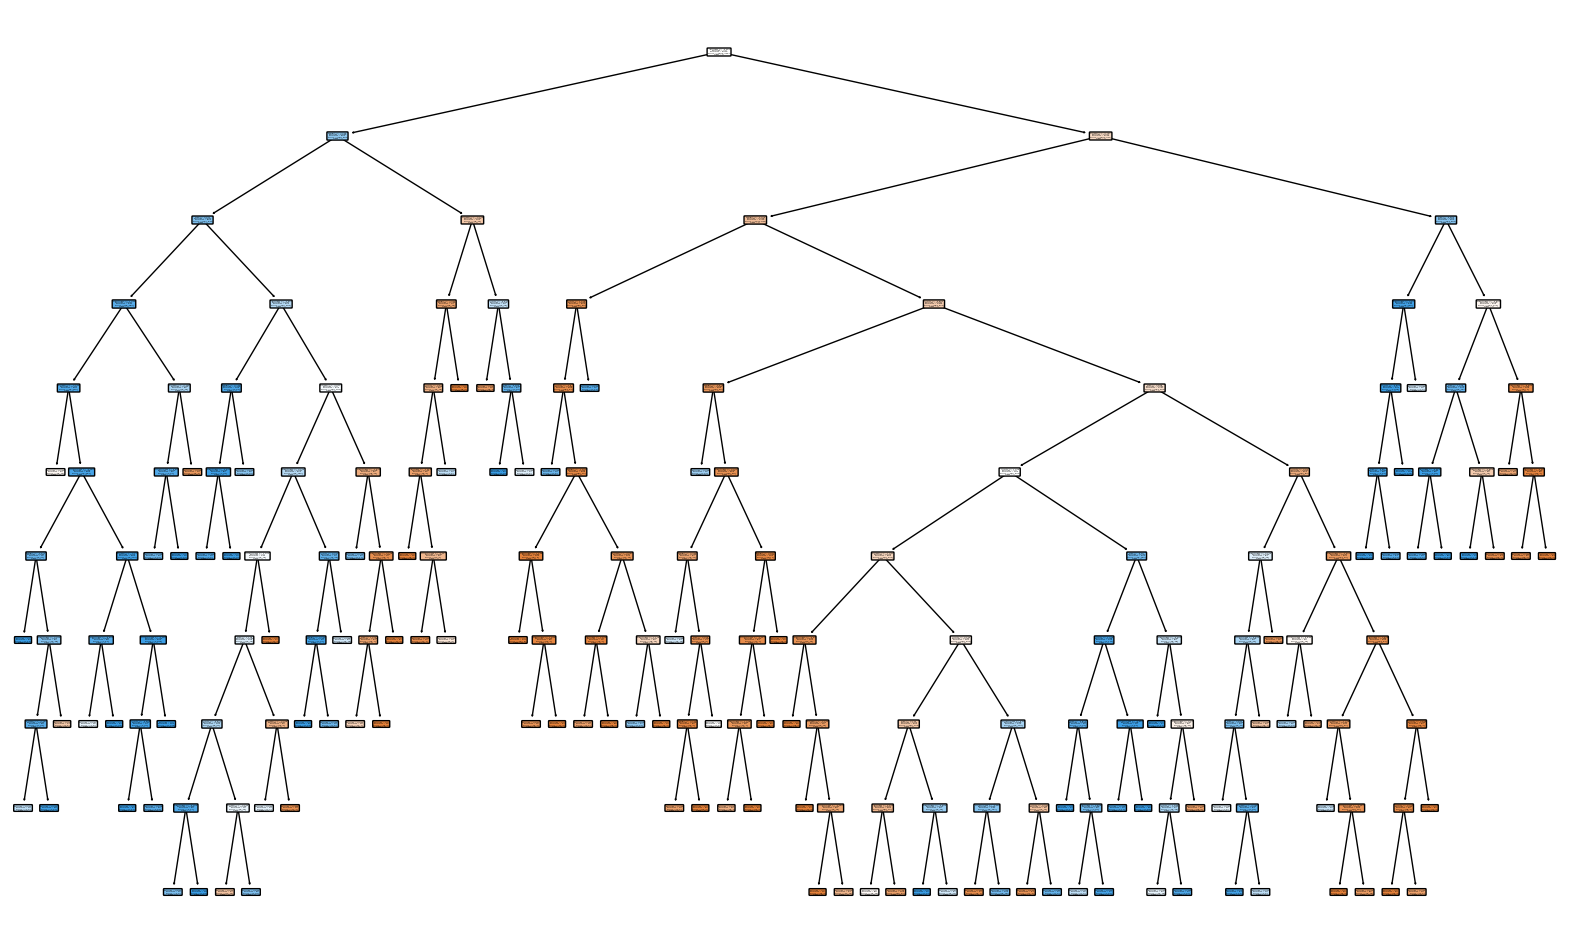

In [ ]:
import matplotlib.pyplot as plt

# Plot the best tree
CART_pre = DecisionTreeClassifier(**grid.best_params_)
CART_pre.fit(X_train,y_train)
plt.figure(figsize=(20,12))
plot_tree(CART_pre,
          feature_names=apple.drop(["A_id","Quality"], axis=1).columns.values,
          class_names=list(map(str, apple['Quality'].unique())),
          rounded=True,
          filled=True)
plt.show()

In [ ]:
print(CART_pre.get_depth())
print(CART_pre.get_n_leaves())
print(roc_auc_score(y_test, CART_pre.predict(X_test)))

10
101
0.7574314357858946


In [ ]:
# NN parameter settings
hidden_layer_sizes = [(3,), (5,), (7,), (3,3), (5,5), (7,7)]
activation = ['identity', 'logistic', 'tanh', 'relu']
learning_rate_init = [0.001, 0.01, 0.1]
max_iter = [100, 300, 500]

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'learning_rate_init': learning_rate_init,
    'max_iter': max_iter
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings(action='ignore')

# Fit the decision tree model and evaluate the results
model = MLPClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid.fit(X, y)

# Find the best set of parameters
best_hidden_layer_sizes = grid.best_params_['hidden_layer_sizes']
best_activation = grid.best_params_['activation']
best_learning_rate_init = grid.best_params_['learning_rate_init']
best_max_iter = grid.best_params_['max_iter']

print("Best hidden_layer_sizes:", best_hidden_layer_sizes)
print("Best activation:", best_activation)
print("Best learning_rate_init:", best_learning_rate_init)
print("Best max_iter:", best_max_iter)

Best hidden_layer_sizes: (7, 7)
Best activation: tanh
Best learning_rate_init: 0.01
Best max_iter: 300


In [ ]:
MLP = MLPClassifier(**grid.best_params_)
MLP.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(7, 7),
              learning_rate_init=0.01, max_iter=300)

In [ ]:
print(roc_auc_score(y_test, MLP.predict(X_test)))

0.879946998674967


#Q10

In [ ]:
from sklearn.linear_model import LogisticRegression

ml_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ml_logit.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
from sklearn.metrics import confusion_matrix

# Performance Evaluation Function ------------------------------------------------
def perf_eval(model, y_test, X_test):

    cm = confusion_matrix(y_test, model.predict(X_test))
    print(cm)

    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)

    return TPR, TNR, ACC, BCR, F1

In [ ]:
# Performance table
Perf_Table = pd.DataFrame(index=["Full Tree", "Post-pruning", "Pre-pruning"],
                          columns = ["TPR", "TNR", "Accuracy", "BCR", "F1-Measure"])

In [ ]:
# Prediction
Perf_Table.iloc[0] = perf_eval(CART_post, y_test, X_test)
Perf_Table.iloc[1] = perf_eval(best_clf, y_test, X_test)
Perf_Table.iloc[2] = perf_eval(CART_pre, y_test, X_test)
Perf_Table

,TPR,TNR,Accuracy,BCR,F1-Measure
Full Tree,0.78392,0.79602,0.79,0.789947,0.787879
Post-pruning,0.788945,0.810945,0.8,0.799869,0.796954
Pre-pruning,0.743719,0.771144,0.7575,0.757307,0.753181


In [ ]:
Perf_Table = pd.DataFrame(index=["Logistic Regression", "Decision Tree", "Neural Network"],
                          columns = ["TPR", "TNR", "Accuracy", "BCR", "F1-Measure"])

In [ ]:
# Prediction
Perf_Table.iloc[0] = perf_eval(ml_logit, y_test, X_test)
Perf_Table.iloc[1] = perf_eval(CART_pre, y_test, X_test)
Perf_Table.iloc[2] = perf_eval(MLP, y_test, X_test)
Perf_Table

[[157  44]
 [ 61 138]]
[[155  46]
 [ 51 148]]
[[179  22]
 [ 26 173]]


,TPR,TNR,Accuracy,BCR,F1-Measure
Logistic Regression,0.693467,0.781095,0.7375,0.735978,0.724409
Decision Tree,0.743719,0.771144,0.7575,0.757307,0.753181
Neural Network,0.869347,0.890547,0.88,0.879883,0.878173
